In [60]:
# Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
# Importing the CSV file into a pandas DataFrame
file_path = 'C:/Users/vinay/Desktop/Siplilearn/Python/Projects/1569582940_googleplaystore/googleplaystore.csv'
data = pd.read_csv('C:/Users/vinay/Desktop/Siplilearn/Python/Projects/1569582940_googleplaystore/googleplaystore.csv')

In [31]:
# Displaying the first few rows of the dataset
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [33]:
# Checking for null values in the data
null_values = data.isnull().sum()

In [35]:
# Dsiplaying the number of null values for each column
print(null_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [37]:
# Drop rows with any null values
data = data.dropna()

In [39]:
# Rechecking for null values in the data
null_values = data.isnull().sum()
print(null_values)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [41]:
data.loc[data['Size'] == '1000+', 'Size'] = 0 

In [43]:
data.loc[data['Size'] == 'Varies with device', 'Size'] = 0 

In [45]:
# Convert 'k' values to numeric
data.loc[data['Size'].str.contains('k', na=False), 'Size'] = data.loc[data['Size'].str.contains('k', na=False), 'Size'].str.replace('k', '').astype(float)

In [47]:
# Convert 'M' values to numeric
data.loc[data['Size'].str.contains('M', na=False), 'Size'] = data.loc[data['Size'].str.contains('M', na=False), 'Size'].str.replace('M', '').astype(float)*1000

In [49]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Replace 'M' in 'Reviews' with an empty string, convert to float, multiply by 1,000,000 for rows containing 'M'
mask = data ['Reviews'].str.contains('M', na=False)
data.loc[mask, 'Reviews'] = data.loc [mask, 'Reviews']. str.replace('M', '') * 1000000

In [57]:
data.to_csv('C:/Users/vinay/Desktop/Siplilearn/Python/Projects/1569582940_googleplaystore/updatedgoogleplaystore', index=False)

In [117]:
# Convert the 'Reviews' column to integer type
data['Reviews'] = data['Reviews'].astype(int)

In [119]:
# Convert the 'Size' column to float type
data['Size'] = data['Size'].astype(float)

In [121]:
# Convert 'Installs' column to integer by removing '+' and ',' characters
def convert_installs(installs):
    if isinstance(installs, str):
        return int(installs.replace('+', '').replace(',', ''))
    return installs
data['Installs'] = data['Installs'].apply(convert_installs)

In [123]:
pd.reset_option('display.max_rows')

In [125]:
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [127]:
free_rows = data[data['Installs'] == 'Free']

In [109]:
print (free_rows)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [137]:
# Convert 'Price' column to float by removing '$' character
def convert_price(price):
    if isinstance(price, str):
        return float(price.replace('$', ''))
    return price
data['Price'] = data['Price'].apply(convert_price)

In [34]:
print(data['Rating'].unique())

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


In [143]:
# Check for rows with ratings lower than 1 or greater than 5
invalid_rating = data[(data['Rating']<1) | (data['Rating']>5)]
print("Rows with invalid ratings")
print(invalid_rating)

Rows with invalid ratings
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [161]:
# Filtering rows where the number of reviews exceeds the number of installs
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [179]:
# Filter rows where app type is 'Free' and price > 0
data[(data['Type'] == 'Free') & (data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Performing univariate analysis

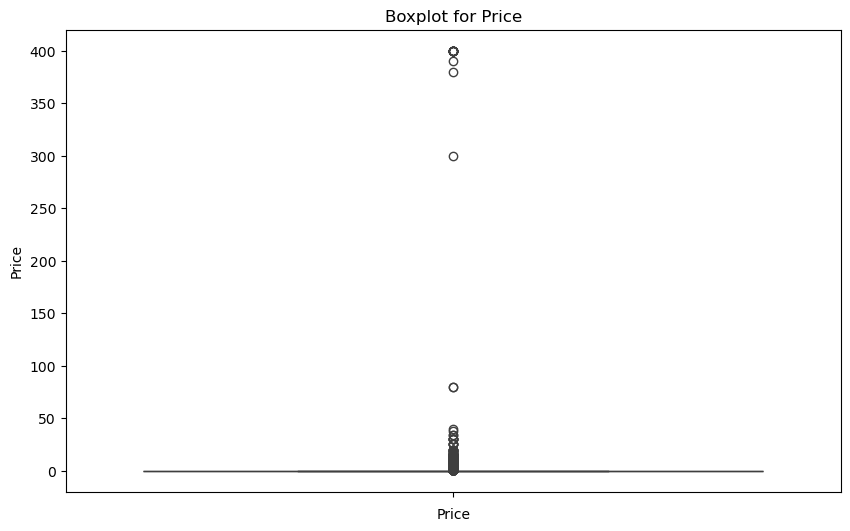

In [187]:
# Boxplot for the Price column
plt.figure(figsize = (10,6))
sns.boxplot(data['Price'])
plt.title('Boxplot for Price')
plt.xlabel('Price')
plt.show()

In [104]:
# Yes, there are outliers in the price of apps on the Play Store, with several priced significantly higher than the typical app

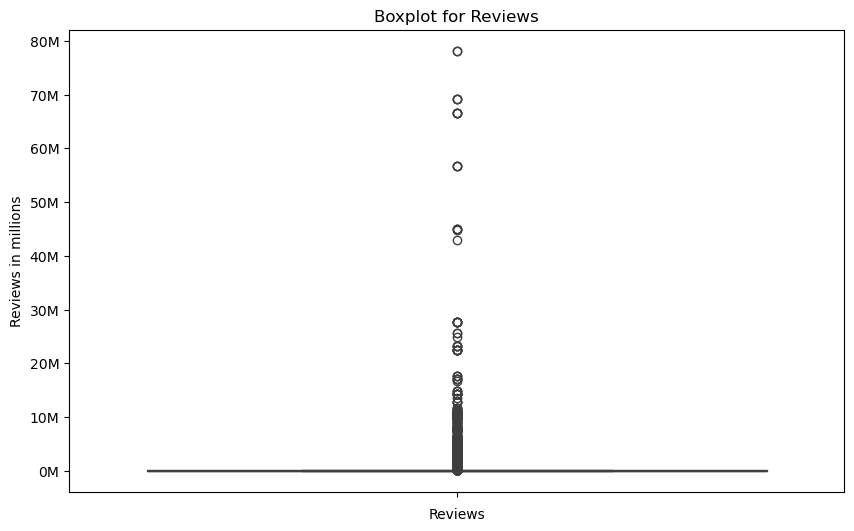

In [44]:
# Boxplot for the Reviews column
plt.figure(figsize = (10,6))
sns.boxplot(data['Reviews'])
plt.title('Boxplot for Reviews')
plt.xlabel('Reviews')
plt.ylabel('Reviews in millions')
plt.yticks(ticks=range(0, 81000000, 10000000), labels=[f'{i}M' for i in range(0, 81, 10)])
plt.show()

In [102]:
#Yes, there are apps with an exceptionally high number of reviews, indicating these are very popular or have been available for a long time. The values seem plausible, but the scale suggests a few apps dominate the review count

In [200]:
# Save the DataFrame to a CSV file
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\App Rating Prediction Project.csv', index=False)

In [8]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\App Rating Prediction Project.csv')

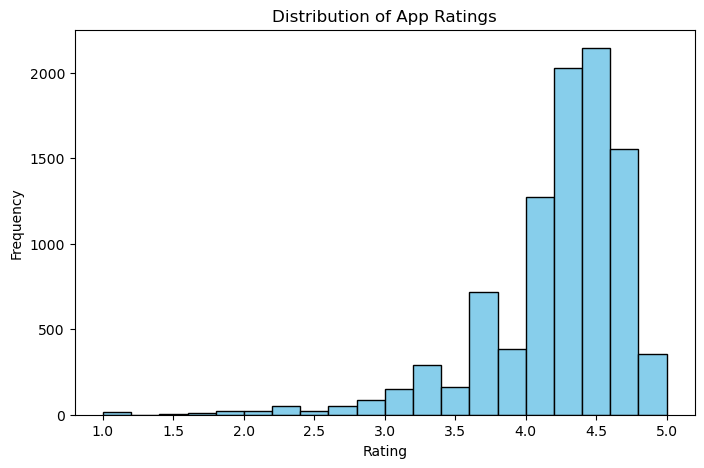

In [18]:
# Histogram for a rating column
plt.figure(figsize=(8,5))
plt.hist(data['Rating'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')

plt.show()

In [100]:
# The ratings are skewed towards higher values, with the majority of apps receiving ratings between 4 and 5, indicating a general user satisfaction with the apps on the platform

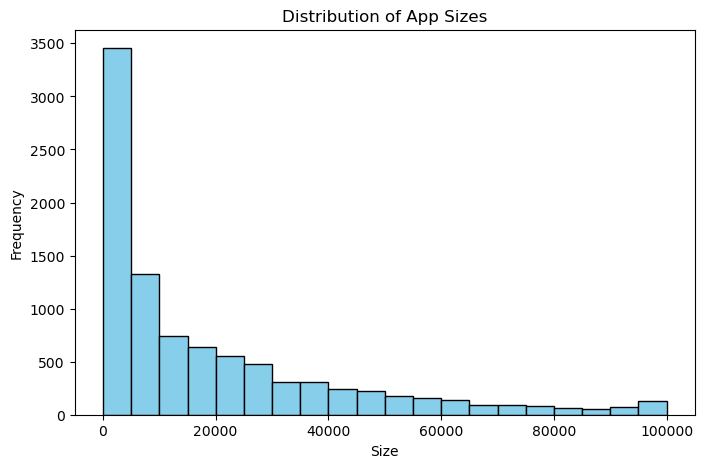

In [24]:
# Histogram for a size column
plt.figure(figsize=(8,5))
plt.hist(data['Size'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')

plt.show()

In [98]:
# The majority of apps are smaller in size, with a significant drop in frequency as size increases, indicating a preference or limitation for developing smaller apps

In [62]:
# Filter rows where Price > 200
High_price = data[data['Price'] > 200]
print(High_price)

                                 App   Category  Rating  Reviews     Size  \
4035          most expensive app (H)     FAMILY     4.3        6   1500.0   
4188                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4193        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5040                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5043                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5044                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5045               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5046             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5047                      I am Rich!    FINANCE     3.8       93  22000.0   
5048              I am rich(premium)    FINANCE     3.5      472    965.0   
5051                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5053  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   

In [88]:
# Keep only rows where Price <= 200
data = data[~(data['Price']>200)]

In [90]:
# Rechecking rows where Price > 200
Updated_high_price = data[data['Price'] > 200]
print(Updated_high_price)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [78]:
# Filter rows with more than 2 million reviews
high_reviews = data[data['Reviews'] > 2000000]
print(high_reviews)

                                           App             Category  Rating  \
131                       Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
322   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
323                         WhatsApp Messenger        COMMUNICATION     4.4   
325               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
327                                      Gmail        COMMUNICATION     4.3   
...                                        ...                  ...     ...   
8070              Modern Combat 5: eSports FPS                 GAME     4.3   
8616                              Google Earth     TRAVEL_AND_LOCAL     4.3   
8877                          Farm Heroes Saga               FAMILY     4.4   
8880                           Fallout Shelter               FAMILY     4.6   
9009                          Garena Free Fire                 GAME     4.5   

       Reviews     Size    Installs  Type  Price Co

In [82]:
data = data[data['Reviews'] < 2000000]
print (data)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9348                                      FR Calculator               FAMILY   
9349                                   Sya9a Maroc - FR               FAMILY   
9350                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9351                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9352      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews     Size  Install

In [92]:
# Rechecking rows with more than 2 million reviews
updated_high_reviews = data[data['Reviews'] > 2000000]
print(updated_high_reviews)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [94]:
# Save the DataFrame to a CSV file
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\App Rating Prediction Project.csv', index=False)

In [4]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\App Rating Prediction Project.csv')

In [36]:
print(data['Installs'].unique())

[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
        100        500         10          5         50  500000000]


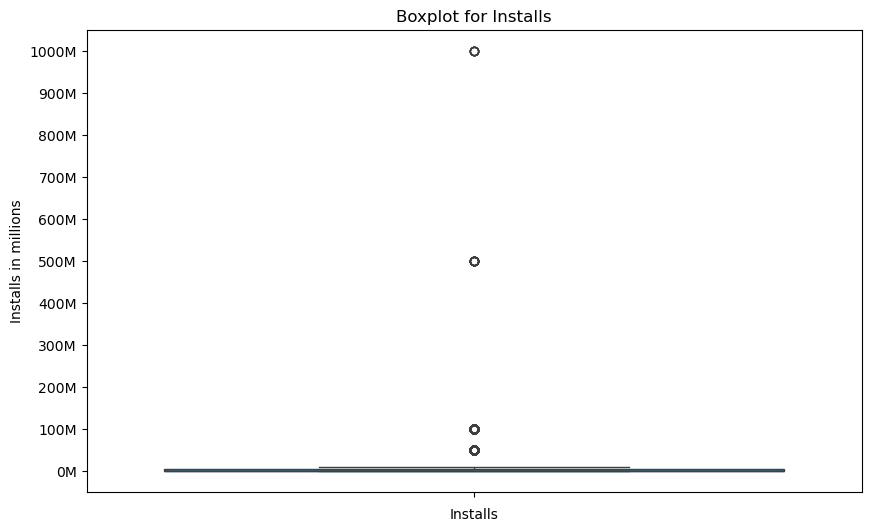

In [76]:
# Boxplot for the Installs column
plt.figure(figsize=(10,6))
sns.boxplot(data['Installs'])
plt.title('Boxplot for Installs')
plt.xlabel('Installs')
plt.ylabel('Installs in millions')

# Fixing yticks
ticks_values = range(0, 1100000000, 100000000)  # Every 100 million
ticks_labels = [f'{i//1000000}M' for i in ticks_values]  # Corrected variable name

plt.yticks(ticks=ticks_values, labels=ticks_labels)  # Apply correct ticks
plt.show()

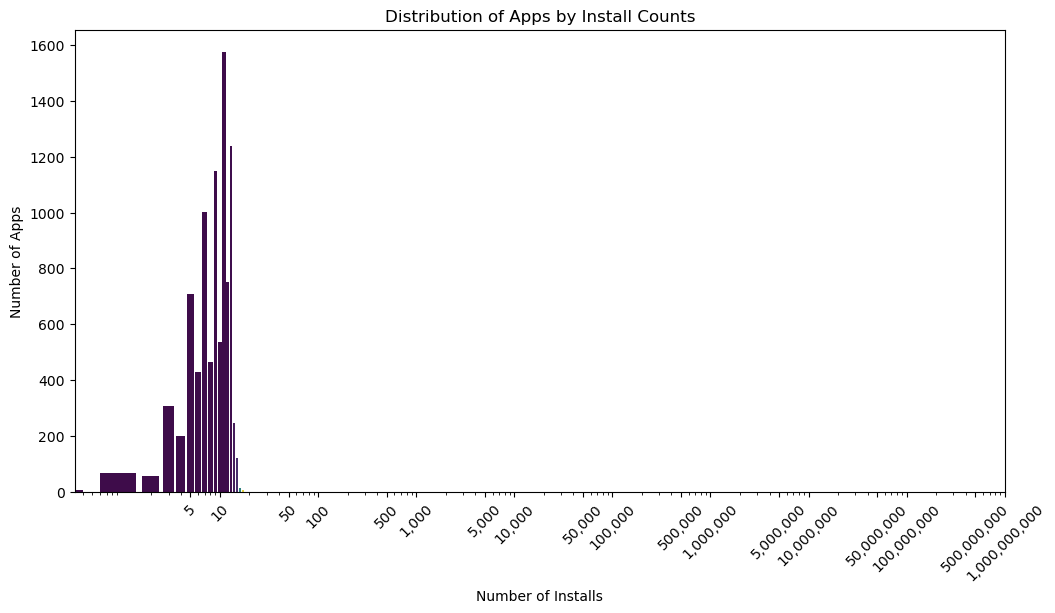

In [74]:
# Count occurrences of each unique install value and plot bar cahrt of Installs column
install_counts = data['Installs'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=install_counts.index, y=install_counts.values, hue=install_counts.index, palette='viridis', legend=False)

plt.xscale('log')
tick_values = [10000, 500000, 5000000, 50000000, 100000, 50000, 1000000, 
              10000000, 5000, 100000000, 1000000000, 1000, 100, 500, 10, 5, 50, 500000000]
plt.xticks(ticks=tick_values, labels=[f"{x:,}" for x in tick_values], rotation=45)


plt.xticks(rotation=45)
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.title('Distribution of Apps by Install Counts')

plt.show()

In [90]:
# Calculate the percentiles
percentiles = [10, 25, 50, 70, 90, 95, 99]
installs_percentiles = np.percentile(data['Installs'], percentiles)

percentile_dict = {f'{p}%': installs_percentiles[i] for i, p in zip(range(len(percentiles)), percentiles)}

print(percentile_dict)

{'10%': 1000.0, '25%': 10000.0, '50%': 500000.0, '70%': 1000000.0, '90%': 10000000.0, '95%': 10000000.0, '99%': 100000000.0}


In [96]:
# Calculate the 99th percentile threshold
percentile_99 = np.percentile(data['Installs'], 99)

print(percentile_99)

100000000.0


In [108]:
# Remove only the rows where 'Installs' is exactly equal to the 99th percentile value
data = data[data['Installs'] <= percentile_99]

In [114]:
#Bivariate analysis
# Set the style for better visualization
sns.set_style('whitegrid')

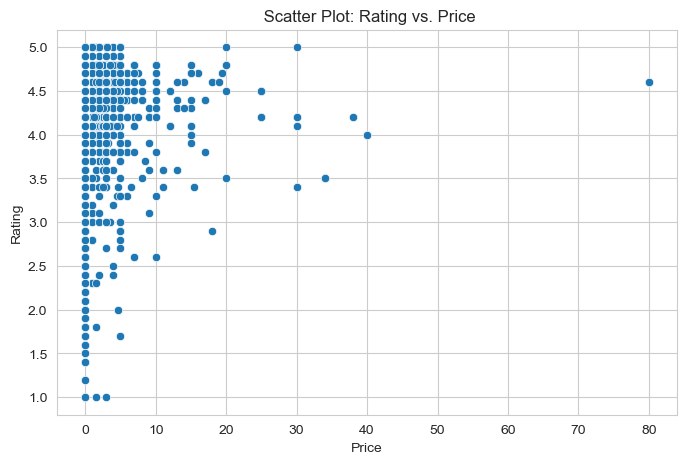

In [116]:
# Scatter Plot: Rating vs. Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Price'], y=data['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title(' Scatter Plot: Rating vs. Price')
plt.show()


In [90]:
# The scatter plot shows that most apps are free or low-cost, with no clear relationship between price and rating
# A few expensive apps exist, but they don't necessarily have higher rating

In [6]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\App Rating Prediction Project.csv')

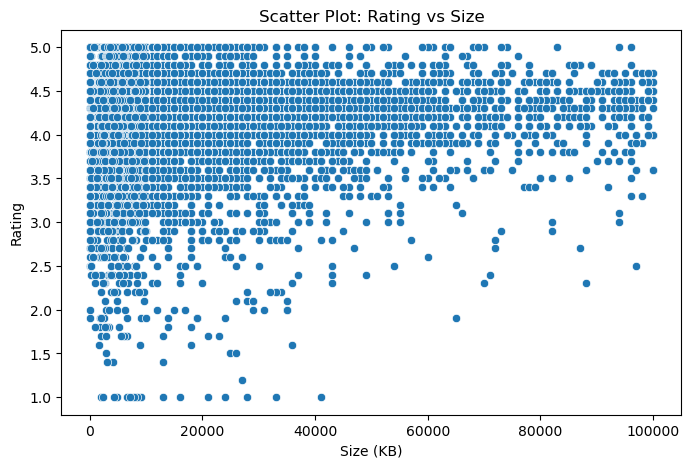

In [14]:
# Scatter Plot: Rating vs Size
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Size'], y=data['Rating'])
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.title('Scatter Plot: Rating vs Size')
plt.show()

In [88]:
# The scatter plot shows no strong relationship between app size and rating, as ratings are spread across all sizes
# Smaller apps tend to be more densly distributed, but larger apps still shows both high and low ratings

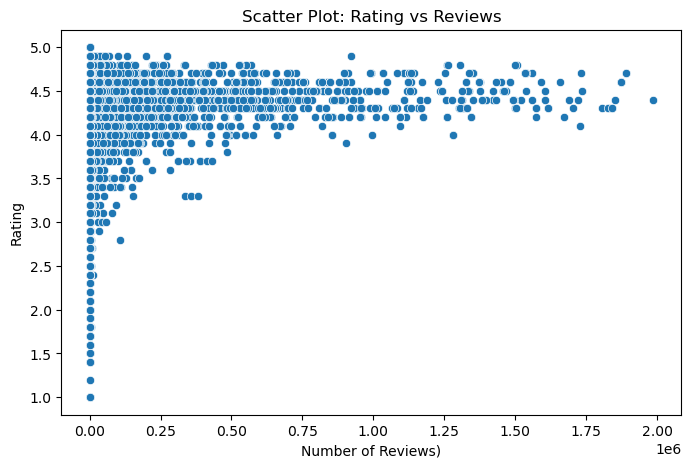

In [16]:
# Scatter Plot: Rating vs Reviews
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Reviews'], y=data['Rating'])
plt.xlabel('Number of Reviews)')
plt.ylabel('Rating')
plt.title('Scatter Plot: Rating vs Reviews')
plt.show()

In [86]:
# Apps with more reviews tend to have higher ratings, but some highly reviewed apps still have lower ratings
# Most highly-rated apps have many reviews, but some low-rated apps also have a high number of reviews

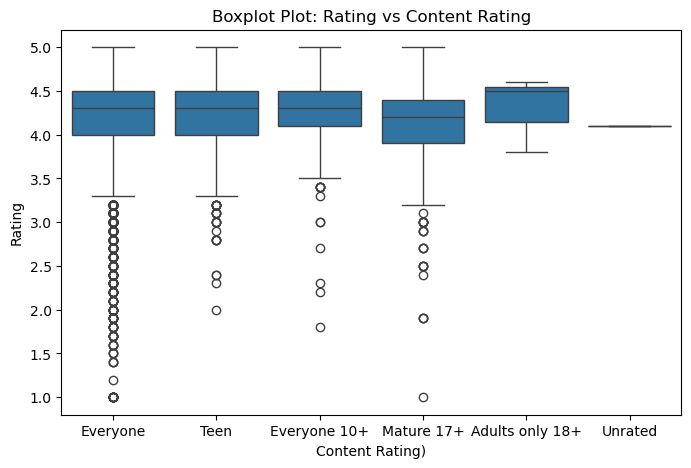

In [18]:
# boxplot Plot: Rating vs Content Rating
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Content Rating'], y=data['Rating'])
plt.xlabel('Content Rating)')
plt.ylabel('Rating')
plt.title('Boxplot Plot: Rating vs Content Rating')
plt.show()

In [ ]:
# There's no clear preference for one content rating over another in terms of app ratings; however, 'Adults only 18+' categories exhibit slightly more consistent user satisfaction with no outliers

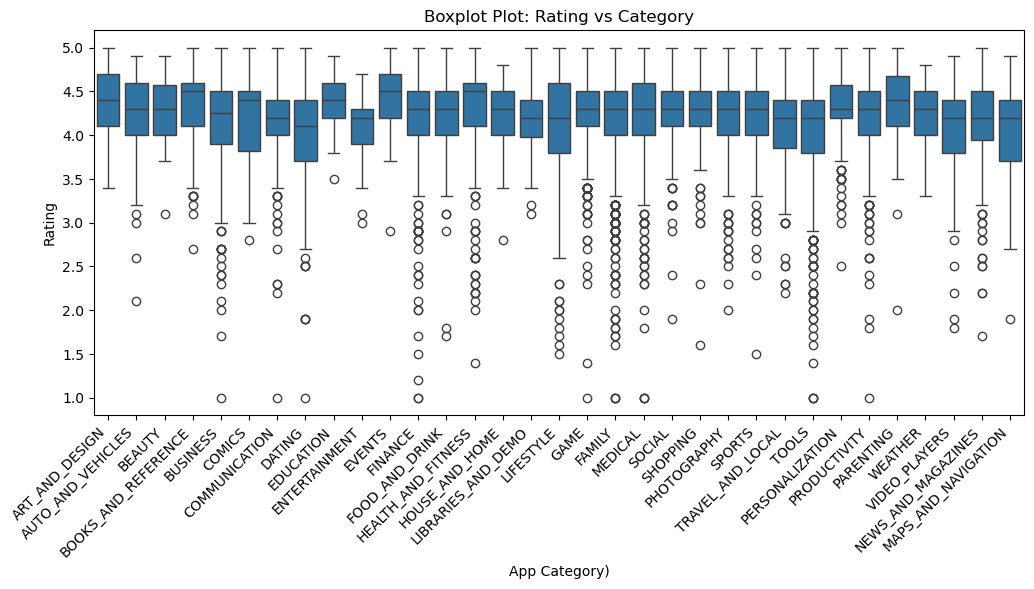

In [41]:
# boxplot Plot: Rating vs category
plt.figure(figsize=(12,5))
sns.boxplot(x=data['Category'], y=data['Rating'])
plt.xlabel('App Category)')
plt.ylabel('Rating')
plt.title('Boxplot Plot: Rating vs Category')
plt.xticks(rotation=45, ha="right")
plt.show()

In [92]:
# Most app categories exhibit similar median ratings around 4.0 to 4.5, with slight variations, indicating no single genre stands out as having the best ratings across the board

In [46]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\App rating project 2nd part after data processing\App Rating Prediction Project part 2nd.csv')

In [22]:
# Creates a duplicate of 'data'
imp1 = data.copy()

In [24]:
# Apply log transformation to 'Reviews' and 'Installs' to reduce skew
imp1['Reviews'] = np.log1p(imp1['Reviews'])
imp1['Installs'] = np.log1p(imp1['Installs'])

print(imp1[['Reviews', 'Installs']].head())

     Reviews   Installs
0   5.075174   9.210440
1   6.875232  13.122365
2  11.379520  15.424949
3  12.281389  17.727534
4   6.875232  11.512935


In [26]:
# Drop unnecessary columns
imp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'], inplace = True)

print(imp1.head)

<bound method NDFrame.head of                  Category  Rating    Reviews     Size   Installs  Type  Price  \
0          ART_AND_DESIGN     4.1   5.075174  19000.0   9.210440  Free    0.0   
1          ART_AND_DESIGN     3.9   6.875232  14000.0  13.122365  Free    0.0   
2          ART_AND_DESIGN     4.7  11.379520   8700.0  15.424949  Free    0.0   
3          ART_AND_DESIGN     4.5  12.281389  25000.0  17.727534  Free    0.0   
4          ART_AND_DESIGN     4.3   6.875232   2800.0  11.512935  Free    0.0   
...                   ...     ...        ...      ...        ...   ...    ...   
8738               FAMILY     4.0   2.079442   2600.0   6.216606  Free    0.0   
8739               FAMILY     4.5   3.663562  53000.0   8.517393  Free    0.0   
8740               FAMILY     5.0   1.609438   3600.0   4.615121  Free    0.0   
8741  BOOKS_AND_REFERENCE     4.5   4.744932      0.0   6.908755  Free    0.0   
8742            LIFESTYLE     4.5  12.894981  19000.0  16.118096  Free    0.0  

In [6]:
data = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\App rating project 2nd part after data processing\App Rating Prediction Project part 2nd.csv')

In [36]:
imp1 = pd.read_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\App rating project 2nd part after data processing\(imp1)App Rating Prediction Project part 2nd.csv')

In [46]:
# Convert cattegorical variables into dummy/one-hot encoded variables

imp2 = pd.get_dummies(imp1, columns=['Category', 'Genres', 'Content Rating', 'Type'])

print(imp2.head())

   Rating    Reviews     Size   Installs  Price  Category_ART_AND_DESIGN  \
0     4.1   5.075174  19000.0   9.210440    0.0                     True   
1     3.9   6.875232  14000.0  13.122365    0.0                     True   
2     4.7  11.379520   8700.0  15.424949    0.0                     True   
3     4.5  12.281389  25000.0  17.727534    0.0                     True   
4     4.3   6.875232   2800.0  11.512935    0.0                     True   

   Category_AUTO_AND_VEHICLES  Category_BEAUTY  Category_BOOKS_AND_REFERENCE  \
0                       False            False                         False   
1                       False            False                         False   
2                       False            False                         False   
3                       False            False                         False   
4                       False            False                         False   

   Category_BUSINESS  ...  Genres_Weather  Genres_Word  \
0   

In [58]:
imp2.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\App rating project 2nd part after data processing\(imp2)App Rating Prediction Project part 2nd.csv', index=False)

In [64]:
# Separate independent (X) and dependent (y) variables
x = imp2.drop(columns=['Rating'])
y = imp2['Rating']

# Split the dataset into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Verify the shapes
print(f'Training set size: x_train = {x_train.shape}, y_train = {y_train.shape}')
print(f'Testing set size: x_test = {x_test.shape}, y_test = {y_test.shape}')

Training set size: x_train = (6120, 160), y_train = (6120,)
Testing set size: x_test = (2623, 160), y_test = (2623,)


In [72]:
# Initialize the Linear Regression model
model = LinearRegression()

model.fit(x_train, y_train)

train_r2 = model.score(x_train, y_train)

print(f'R2 score on training set: {train_r2:.4f}')

R2 score on training set: 0.1643


In [ ]:
# R2 is relatively low which suggests that the linear regression model is not performing very well 

In [76]:
# Still we are making pridictions on the set as its the requirement of the project
y_pred = model.predict(x_test)

# Evaluating model performance
test_r2 = r2_score(y_test, y_pred)

print(f'R2 score on the test set: {test_r2:.4f}')

R2 score on the test set: 0.1421


In [106]:
data.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\Final project files\(data)App Rating Prediction Project .csv', index=False)

In [ ]:
imp1.to_csv(r'C:\Users\vinay\Desktop\Siplilearn\Python\Projects\1569582940_googleplaystore\Project csv files\Final project files\(data)App Rating Prediction Project .csv', index=False)